In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

I start by making an easy example. I create the function 'fy' as shown below.

In [2]:
period = 2.2
period2 = 15.4

fx, dt = np.linspace(0,100.,2**10,retstep=True)
fy = np.sin(2.*np.pi*fx/period)

Now, I use the fast fourier transform 'fft'

In [3]:
out = np.fft.fft(fy)
freq = np.fft.fftfreq(fx.shape[0],dt)


 We want to see how the function looks like

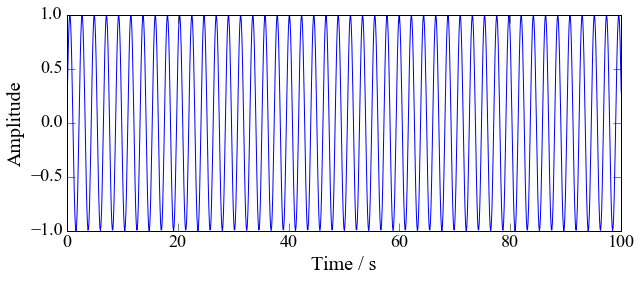

In [4]:
n = freq.size/2
fig = plt.figure(1,figsize=(10,8))
plt.clf()
fig.add_subplot(211)
plt.plot(fx,fy)
plt.xlabel('Time / s')
plt.ylabel('Amplitude')

No we want to obtain the Power Spectrum for such function. I recall the 'out' array

/Users/tesuno/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/tesuno/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/tesuno/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide


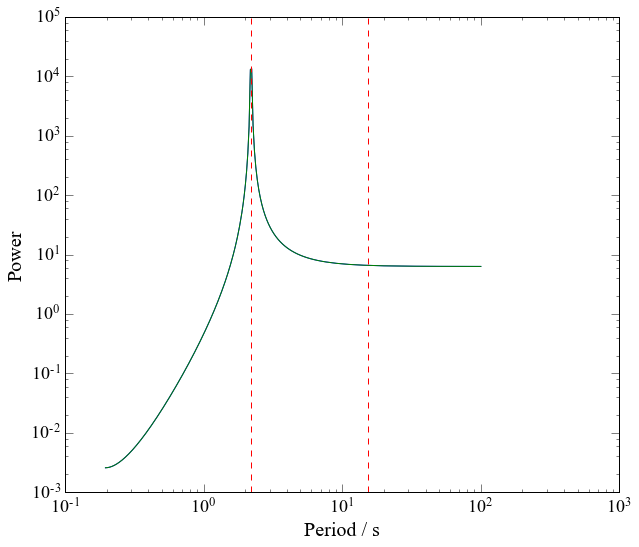

In [5]:
fig = plt.figure(1,figsize=(10,8))
#fig.add_subplot(212)
plt.plot(1./freq[:],(1.0/8.0)*np.abs(out[:])**2, label = '1/8')
plt.plot(1./freq[:n],(1.0/8.0)*np.abs(out[:n])**2, label = '1/8')
#plt.plot(1./freq[:n],(1.0/3.0)*np.abs(out[:n])**2, label = '1/3' )
plt.loglog()
plt.xlabel('Period / s')
plt.ylabel('Power')
plt.axvline(x=period,ls='--',color='r')
plt.axvline(x=period2,ls='--',color='r')
plt.draw()

The dash vertical lines should give me the original values I set for the periods at the beginning.



Now, let's create a mock Lyman alpha flux

In [27]:
x = np.arange(0.,200,0.06)
period_la = 3
sigma_la = 3
num_lines = 50 #This gives me the number of absorption lines 
y = np.ones(x.size)
centre = np.zeros(num_lines)
for i in range(num_lines-1): 
    rand_x = (np.random.normal(period_la,sigma_la)) #Here the 7
    centre[i+1]=centre[i] + rand_x
    y_fluct = np.random.uniform(0.2,0.8) * np.exp(-(x-centre[i+1])**2/(2*0.5**2))
    y -= y_fluct
y += np.random.normal(0,0.1,size=y.size)

In [28]:
(centre)

array([   0.        ,    2.31254979,    6.92952657,   14.5067987 ,
         24.16136835,   28.1814535 ,   31.95463661,   35.61470901,
         44.6201827 ,   47.91321137,   51.0940652 ,   56.04851237,
         56.81663802,   60.38920227,   68.30549781,   74.0668971 ,
         75.00847018,   80.52549359,   82.71933524,   89.27412001,
         91.28830759,   97.054121  ,   97.51126219,  101.77201518,
        104.72801113,  107.139815  ,  113.74071547,  116.55489795,
        117.5266107 ,  121.44834772,  124.95650522,  123.58438864,
        124.71353357,  127.3567875 ,  138.82781989,  140.4024903 ,
        140.98412785,  135.26139692,  135.76562999,  134.1816556 ,
        140.97889558,  144.11074729,  152.80534983,  155.71461918,
        161.88845982,  162.76048668,  165.33379007,  166.60962972,
        170.39228946,  175.55315047])

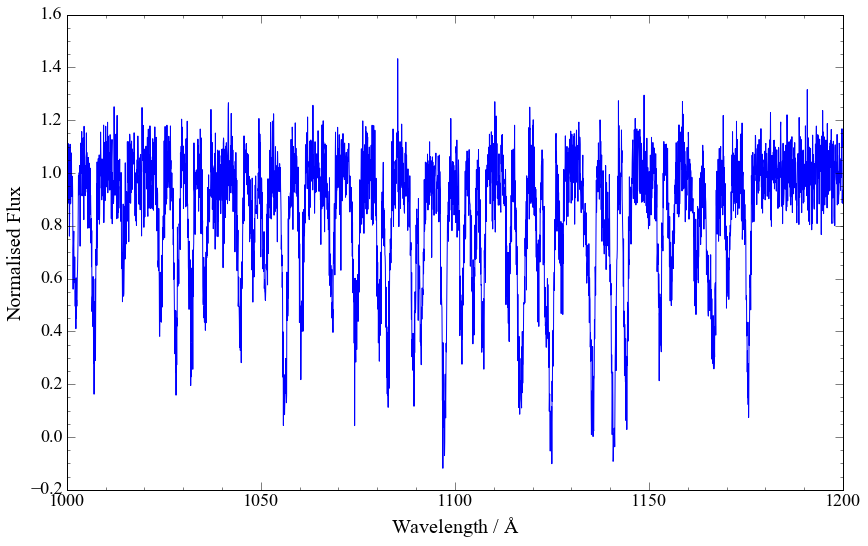

In [29]:
fig = plt.figure(1,figsize=(14,8))
plt.minorticks_on()
#plt.plot(x,y)
plt.plot(x+1000, y )
plt.xlabel('Wavelength / $\AA$')
plt.ylabel('Normalised Flux')

As before, we use the 'fft'function for the PS

In [30]:
out = np.fft.fft(y)
freq = np.fft.fftfreq(x.shape[0]+1000,0.02)

/Users/tesuno/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(0.0001, 10)

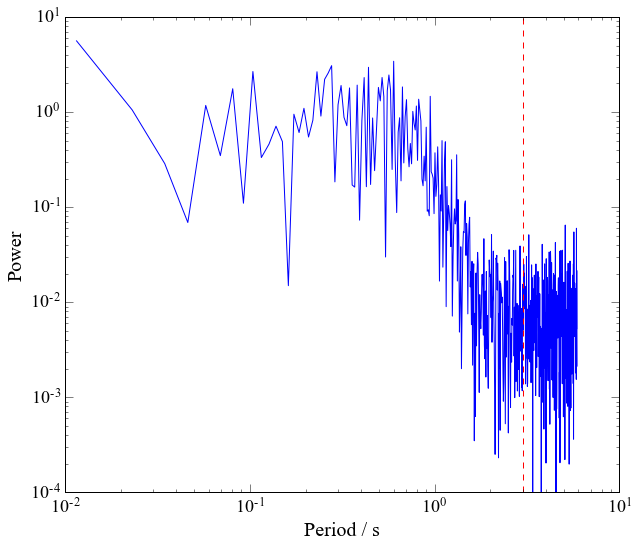

In [31]:
fig = plt.figure(1,figsize=(10,8))
plt.minorticks_on()
#fig.add_subplot(212)
#plt.plot(freq[:],(1.0/x.size)*np.abs(out[:])**2, label = '1/8')
plt.plot(freq[:n], (1.0/x.size)*np.abs(out[:n])**2, label = '1/8')
#plt.plot(1./freq[:n],(1.0/3.0)*np.abs(out[:n])**2, label = '1/3' )
plt.loglog()
plt.xlabel('Period / s')
plt.ylabel('Power')
#plt.axvline(x=1/period,ls='--',color='r')
plt.axvline(x=period_la,ls='--',color='r')
plt.draw()
plt.ylim(1e-4,10)

This PS has white noise and red noise, then maybe can apply a model or a fit